In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Folder path

path = r'C:\Users\Windows 10\Documents\04-2023 Instacart Basket Analysis'
print(path)

C:\Users\Windows 10\Documents\04-2023 Instacart Basket Analysis


In [3]:
# Importing 'orders_products_customers.pkl'

df_prods_ords_cust = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers.pkl'))

In [4]:
df_prods_ords_cust.shape

(32404859, 31)

In [5]:
df_prods_ords_cust.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,spending_flag,median_prior_orders,order_frequency_flag,gender,state,age,date_joined,dependants_number,family_status,income
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423


### Continuation from Step 2

#### Sampling Data

In [6]:
# Create a list holding True/False values to the test np.random.rand() <= 0.7
# This “seed” represents a random but reproducible pattern—Python will always give you the same set of random numbers 

np.random.seed(4)
dev = np.random.rand(len(df_prods_ords_cust)) <= 0.7

In [7]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [8]:
# Store 70% of the sample in the dataframe big

big = df_prods_ords_cust[dev]

In [9]:
# Store 30% of the sample in the dataframe small

small = df_prods_ords_cust[~dev]

In [10]:
df_prods_ords_cust.shape

(32404859, 31)

In [11]:
len(df_prods_ords_cust)

32404859

In [12]:
len(big) + len(small)

32404859

In [13]:
# Creating a new df that includes only necessary columns

df_small = small[['orders_day_of_week','prices']]

#### Line Charts

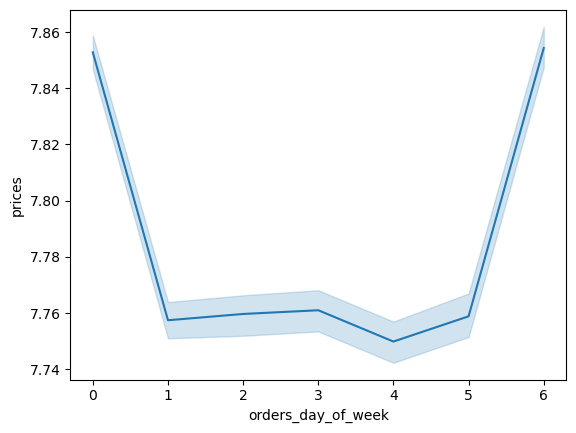

In [14]:
# Line chart

line_week_prices = sns.lineplot(data = df_small, x = 'orders_day_of_week', y = 'prices')

### Step 3

#### You need to provide the Instacart senior stakeholders with descriptive findings about sales. Create a histogram of the “order_hour_of_day” column.

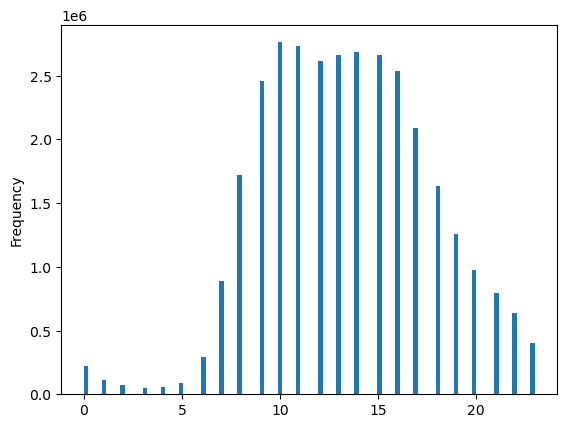

In [16]:
# Creating a histogram for the "order_hour_of_day"

hist_order_hour_of_day = df_prods_ords_cust['order_hour_of_day'].plot.hist(bins = 100)

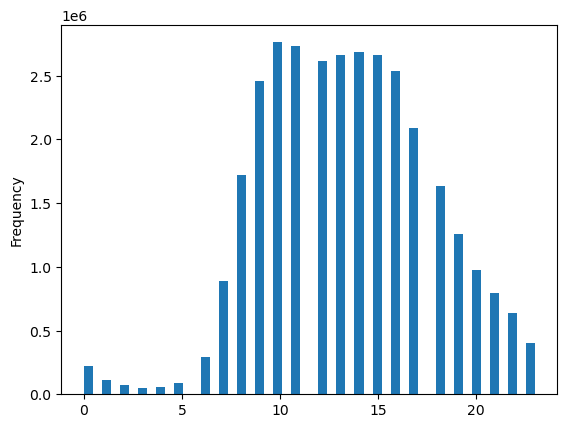

In [18]:
hist_order_hour_of_day = df_prods_ords_cust['order_hour_of_day'].plot.hist(bins = 50)

##### Most people place their orders during business hours between 9am and 5pm (those are busier than other times)

### Step 4

#### The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column.

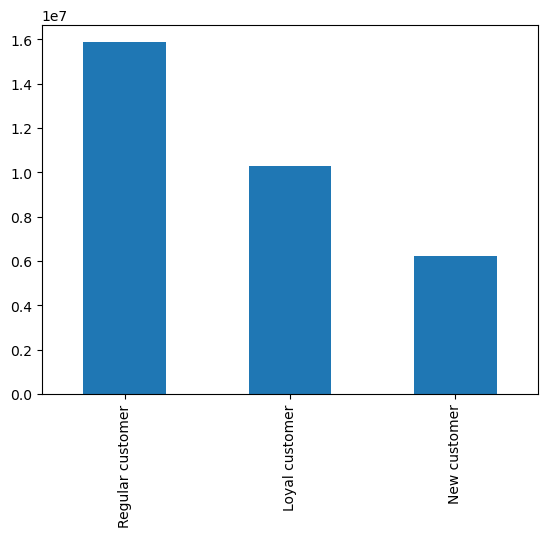

In [19]:
bar_loyalty_flag = df_prods_ords_cust['loyalty_flag'].value_counts().plot.bar()

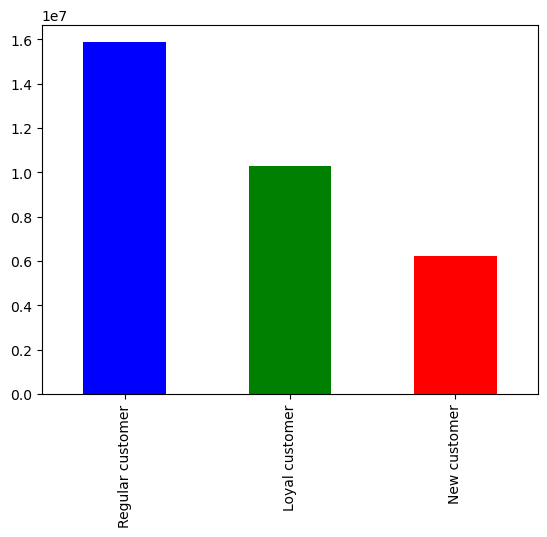

In [21]:
bar_loyalty_flag = df_prods_ords_cust['loyalty_flag'].value_counts().plot.bar(color = ['blue', 'green', 'red'])

##### Most of the people are categorized as regular customers

### Step 5

#### Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. (Hint: To check this, you need to use an accurate sample for your line chart!)

In [22]:
# Creating a new df that includes only necessary columns

df_order_hour_of_day_prices = small[['order_hour_of_day','prices']]

In [23]:
df_order_hour_of_day_prices.head()

,order_hour_of_day,prices
0,8,9.0
2,12,9.0
3,7,9.0
6,9,9.0
10,8,12.5


MemoryError: Unable to allocate 74.2 MiB for an array with shape (9721098, 1) and data type int64

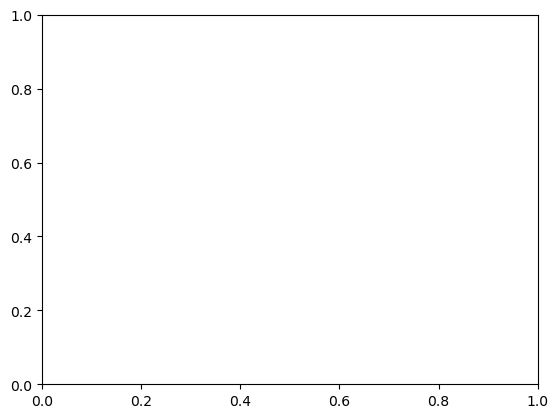

In [24]:
# Creating a line chart for order_hour_of_day and prices

line_order_hour_of_day_prices = sns.lineplot(data = df_order_hour_of_day_prices, x = 'order_hour_of_day', y = 'prices')

In [25]:
# Exporting charts

line_week_prices.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_week_prices.png'))

In [26]:
hist_order_hour_of_day.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_order_hour_of_day.png'))

In [27]:
bar_loyalty_flag.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty_flag.png'))

#### Due to my memory error I had to split my work into different notebooks